In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helper
from matplotlib.lines import Line2D

In [3]:
exp_measures = pd.read_csv("measures.csv")

In [11]:
def plot_var_by_condition(exp_measures, model_measures, var):
    tta_or_conditions = [4, 6]
    markers=["o", "s"]
    colors = ["C0", "C1"]

    fig, axes = plt.subplots(1, 2, figsize=(8,5), sharex=True, sharey=True)

    for tta, ax in zip([4, 6], axes):
        for tta_or, color, marker in zip(tta_or_conditions, colors, markers):
            exp_measures_by_d = exp_measures[(exp_measures.tta_condition == tta) & (exp_measures.tta_or_condition == tta_or)]
            model_measures_by_d = model_measures[(model_measures.tta_condition==tta) & (model_measures.tta_or_condition==tta_or)]

            if var == "is_gap_accepted":
                psf_ci = helper.get_psf_ci(exp_measures_by_d)
                ax.plot(psf_ci.d_condition, psf_ci.p_go, ls="", marker=marker, ms=9, color=color, zorder=10)
                ax.vlines(x=psf_ci.d_condition, ymin=psf_ci.ci_l, ymax=psf_ci.ci_r, color=color, zorder=10)
                ax.plot(model_measures_by_d.d_condition, model_measures_by_d.is_gap_accepted, color=color, label=tta)
            else:
                if var == "RT_merge":
                    measures_mean_sem = helper.get_mean_sem(exp_measures_by_d[exp_measures_by_d.is_gap_accepted],
                                                        var="RT", groupby_var="d_condition", n_cutoff=10)
                elif var == "RT_wait":
                    measures_mean_sem = helper.get_mean_sem(exp_measures_by_d[~(exp_measures_by_d.is_gap_accepted)],
                                                        var="RT", groupby_var="d_condition", n_cutoff=10)
                # measures = exp_measures_by_d[(exp_measures.is_gap_accepted)].groupby(["subj_id", "d_condition"]).mean().reset_index()
                # if len(measures) > 0:
                #     measures_mean_sem = helper.get_mean_sem(measures, var="RT", groupby_var="d_condition", n_cutoff=2)
                    # ax.errorbar(measures_mean_sem.index, measures_mean_sem["mean"], yerr=measures_mean_sem["sem"],
                    #             ls="", marker=marker, ms=9, color=color)
                # measures_mean_sem = helper.get_mean_sem(exp_measures_by_d[exp_measures_by_d.is_gap_accepted],
                #                                         var="RT", groupby_var="d_condition", n_cutoff=10)
                ax.errorbar(measures_mean_sem.index, measures_mean_sem["mean"], yerr=measures_mean_sem["sem"],
                                ls="", marker=marker, ms=9, color=color)
                ax.plot(model_measures_by_d.d_condition, model_measures_by_d[var], color=color, label=tta)

        ax.set_xlabel("Distance to vehicle, m", fontsize=16)
        ax.set_title("TTA to vehicle=%is" % (tta), fontsize=16)
    axes[0].set_ylabel(var, fontsize=16)

    sns.despine(offset=5, trim=True)
    plt.tight_layout()

    legend_elements = ([Line2D([0], [0], color=color, marker=marker, ms=9, lw=0, label="Data, TTA to OnRamp=%is" % (tta_or_condition))
                       for tta_or_condition, color, marker in zip(tta_or_conditions, colors, markers)]
                       + [Line2D([0], [0], color="grey", label="Model")])

    fig.legend(handles=legend_elements, loc="lower left", bbox_to_anchor=(1.0, 0.32), fontsize=16, frameon=False)


# Left-turn model with tta_onramp-dependent drift

In [12]:
model_measures = pd.read_csv("model_fit_results/left_turn_model/simulation_results/subj_all_robust_bic.csv")

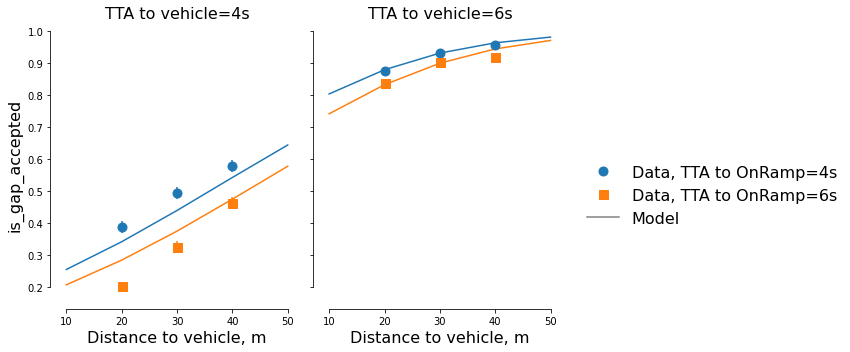

In [13]:
plot_var_by_condition(exp_measures, model_measures, var="is_gap_accepted")

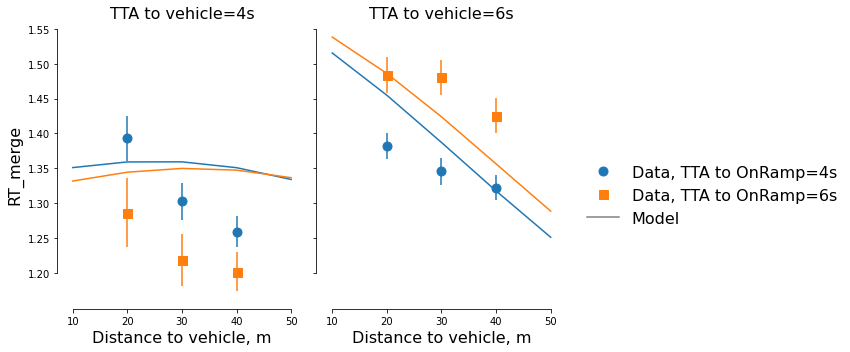

In [15]:
plot_var_by_condition(exp_measures, model_measures, var="RT_merge")

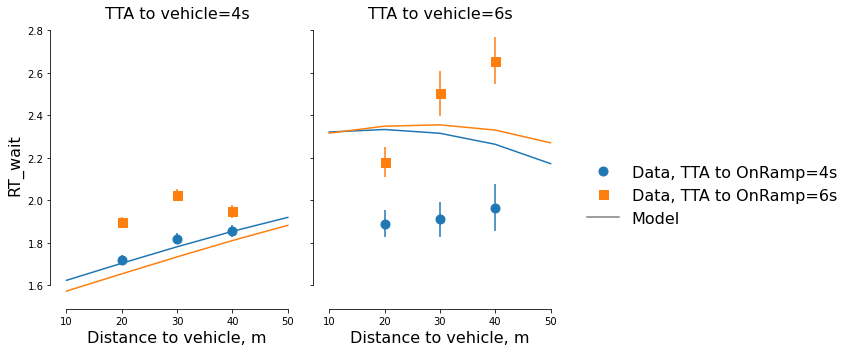

In [16]:
plot_var_by_condition(exp_measures, model_measures, var="RT_wait")

# Modified left-turn model with tta_onramp in both drift and boundary

In [17]:
model_measures = pd.read_csv("model_fit_results/simulation_results/subj_all_measures.csv")

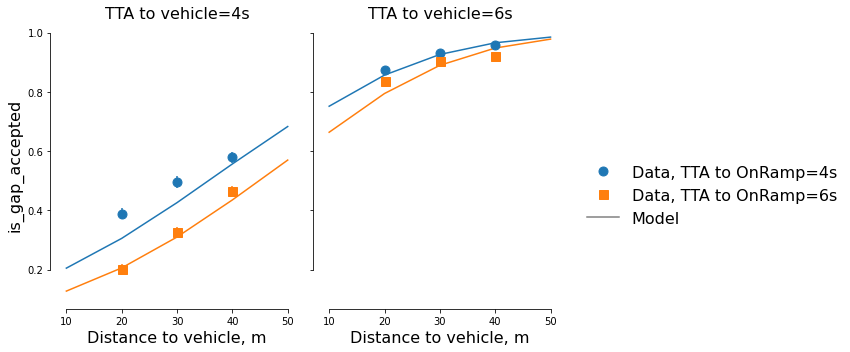

In [18]:
plot_var_by_condition(exp_measures, model_measures, var="is_gap_accepted")

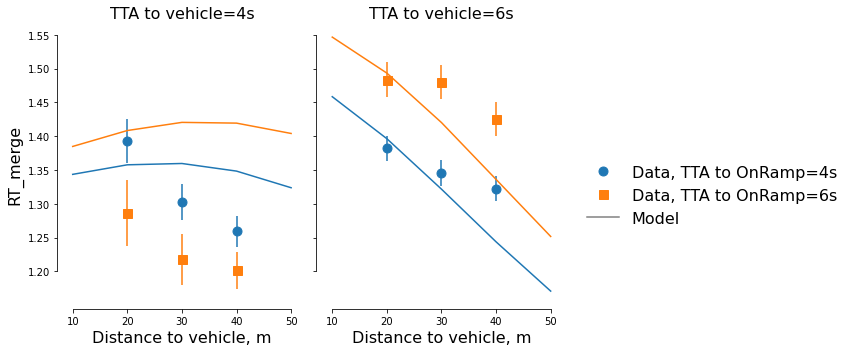

In [19]:
plot_var_by_condition(exp_measures, model_measures, var="RT_merge")

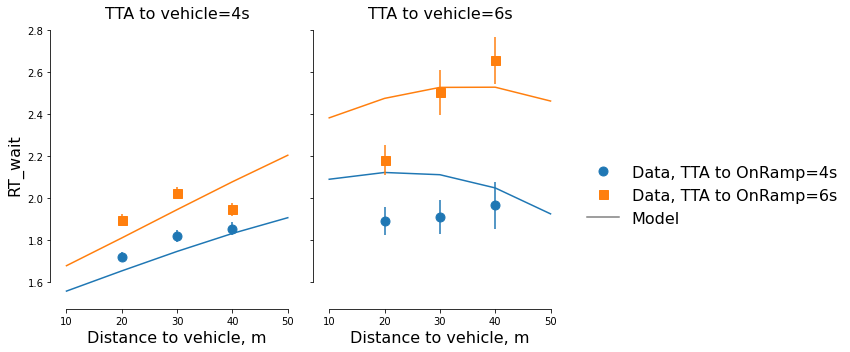

In [20]:
plot_var_by_condition(exp_measures, model_measures, var="RT_wait")